In [42]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.mlab as mlab
import matplotlib
from matplotlib import style
plt.style.use('Solarize_Light2')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

pd.options.mode.chained_assignment = None


In [43]:
import os 

pwd = os.getcwd()

In [44]:
filepath = pwd + ("/RGK v1 - Klippelog 31_05_2024.csv")
filepath

'c:\\Users\\bylde\\Documents\\Vs studio RGK analyse\\Clipvol/RGK v1 - Klippelog 31_05_2024.csv'

In [45]:
df = pd.read_csv(r'c:\\Users\\bylde\\Documents\\Vs studio RGK analyse\\Clipvol/RGK v1 - Klippelog 31_05_2024.csv')


In [46]:
df.head()

,Dato,Retning,Hul,Liter,Maskine,Højde,Bemærkning,Person,Cleanup,Brush
0,16/04/2023,NaN,1,4,NaN,NaN,NaN,NaN,No,NaN
1,16/04/2023,NaN,2,6,NaN,NaN,NaN,NaN,No,NaN
2,16/04/2023,NaN,3,5,NaN,NaN,NaN,NaN,No,NaN
3,16/04/2023,NaN,4,8,NaN,NaN,NaN,NaN,No,NaN
4,16/04/2023,NaN,5,4,NaN,NaN,NaN,NaN,No,NaN


In [47]:
df.describe()

,Hul
count,2900.000000
mean,10.500000
std,5.767276
min,1.000000
25%,5.750000
50%,10.500000
75%,15.250000
max,20.000000


In [48]:
df['Liter'] = pd.to_numeric(df['Liter'], errors='coerce')

In [49]:
df.groupby('Hul')[['Liter']].agg(['min','max','mean','sum','count'])

Liter                               
      min   max       mean     sum count
Hul                                     
1     1.0  28.0   7.262136   748.0   103
2     0.0  33.0   8.100000   891.0   110
3     2.0  26.0   8.181818   900.0   110
4     2.0  39.0  10.448276  1212.0   116
5     2.0  30.0   8.518868   903.0   106
6     1.0  32.0   9.844037  1073.0   109
7     1.0  34.0   9.245455  1017.0   110
8     1.0  23.0   6.990826   762.0   109
9     1.0  22.0   7.571429   848.0   112
10    1.0  24.0   8.425926   910.0   108
11    1.0  26.0   7.464286   836.0   112
12    3.0  44.0  10.830357  1213.0   112
13    1.0  31.0   8.636364   950.0   110
14    3.0  37.0   8.990909   989.0   110
15    2.0  35.0   9.785714  1096.0   112
16    2.0  40.0   8.630631   958.0   111
17    1.0  36.0   8.718182   959.0   110
18    1.0  19.0   6.629630   716.0   108
19    1.0  42.0   7.968421   757.0    95
20    0.0   8.0   2.476190   208.0    84

In [50]:
df['Dato'] = pd.to_datetime(df['Dato'], format='%d/%m/%Y', dayfirst=True)

df['Dato'] = df['Dato'].dt.strftime('%d/%m/%Y')

df.head()

,Dato,Retning,Hul,Liter,Maskine,Højde,Bemærkning,Person,Cleanup,Brush
0,16/04/2023,NaN,1,4.0,NaN,NaN,NaN,NaN,No,NaN
1,16/04/2023,NaN,2,6.0,NaN,NaN,NaN,NaN,No,NaN
2,16/04/2023,NaN,3,5.0,NaN,NaN,NaN,NaN,No,NaN
3,16/04/2023,NaN,4,8.0,NaN,NaN,NaN,NaN,No,NaN
4,16/04/2023,NaN,5,4.0,NaN,NaN,NaN,NaN,No,NaN


In [51]:
df['Dato'] = pd.to_datetime(df['Dato'], format='%d/%m/%Y', dayfirst=True)

df['Month'] = df['Dato'].dt.to_period('M')

Month_df = df.sort_values(by='Month')

Month_df


,Dato,Retning,Hul,Liter,Maskine,Højde,Bemærkning,Person,Cleanup,Brush,Month
0,2023-04-16,NaN,1,4.0,NaN,NaN,NaN,NaN,No,NaN,2023-04
32,2023-04-18,NaN,13,4.0,NaN,NaN,NaN,NaN,No,NaN,2023-04
33,2023-04-18,NaN,14,4.0,NaN,NaN,NaN,NaN,No,NaN,2023-04
34,2023-04-18,NaN,15,3.0,NaN,NaN,NaN,NaN,No,NaN,2023-04
35,2023-04-18,NaN,16,4.0,NaN,NaN,NaN,NaN,No,NaN,2023-04
...,...,...,...,...,...,...,...,...,...,...,...
2895,NaT,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2896,NaT,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2897,NaT,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2898,NaT,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


<function matplotlib.pyplot.show(close=None, block=None)>

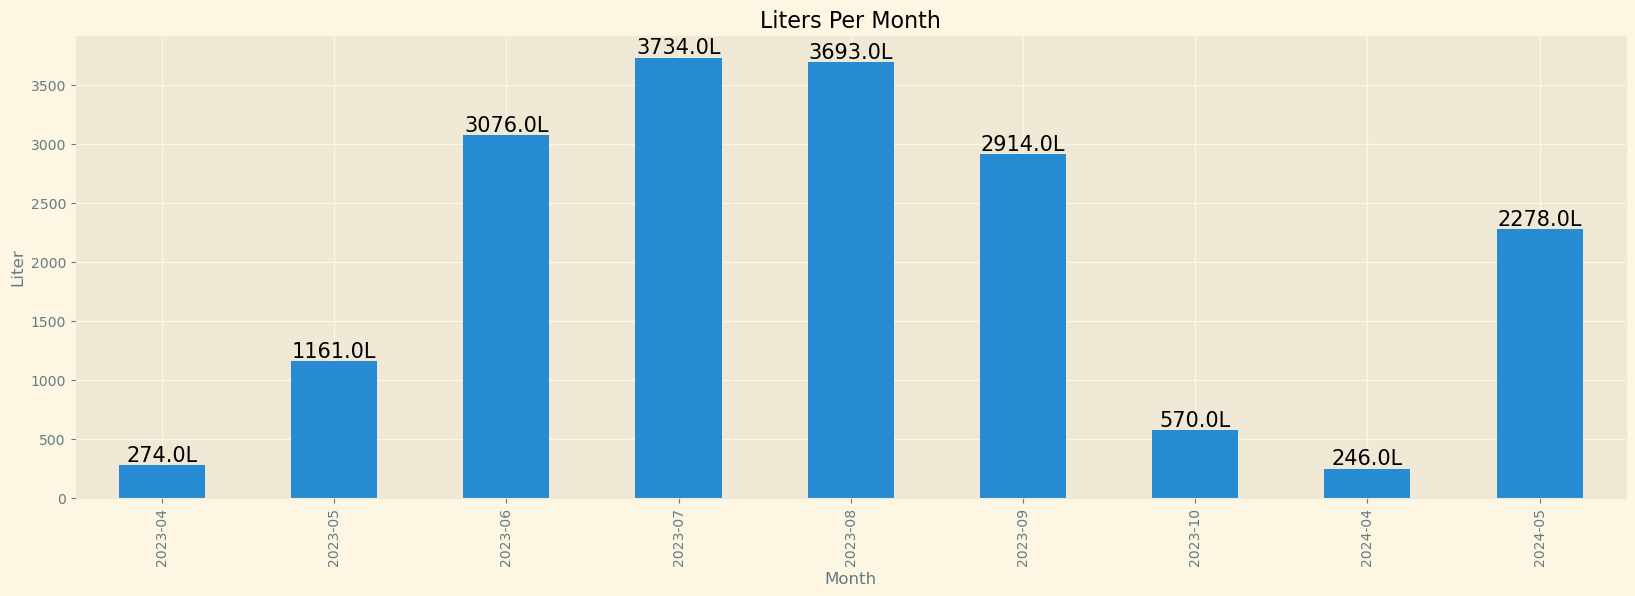

In [52]:
Month_df['Month'] = Month_df['Dato'].dt.to_period('M')

Month_plot = Month_df.groupby(['Month'])['Liter'].agg(sum)

ax = Month_plot.plot(kind='bar',figsize=(20,6),alpha=1)

ax.set_title('Liters Per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Liter')

for bar in ax.containers:
    ax.bar_label(bar,fmt='%.1fL',label_type='edge',fontsize=15,color='black')

plt.show

In [53]:
df['Week'] = df['Dato'].dt.to_period('W')

may_2024_weeks = df[df['Dato'].dt.to_period('M') == pd.Period('2024-05', 'M')]

may_2024_sorted = may_2024_weeks.sort_values(by='Week')

<function matplotlib.pyplot.show(close=None, block=None)>

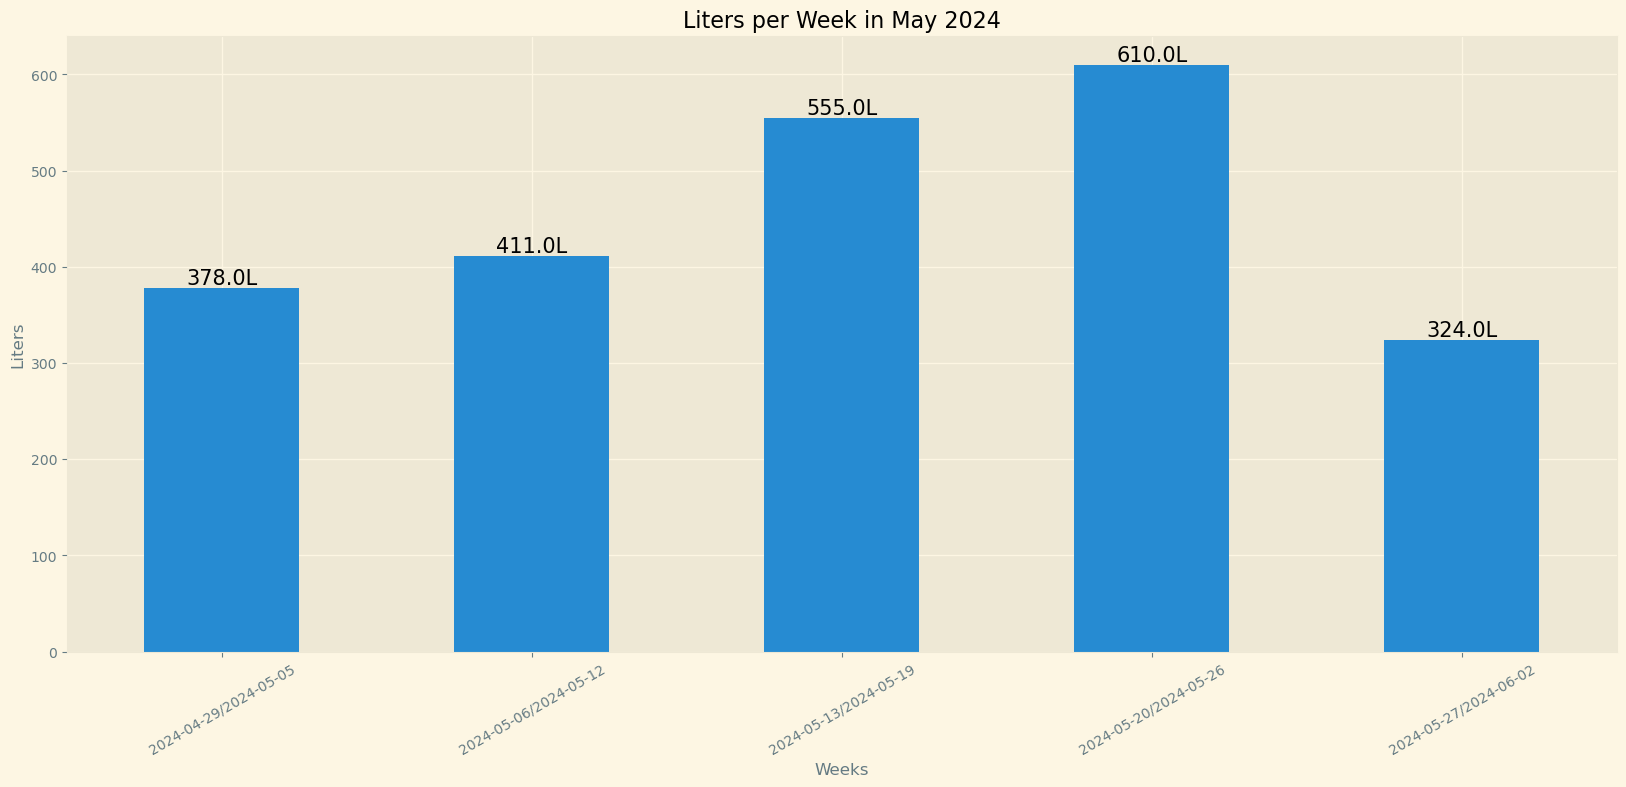

In [59]:
weekly_liter = may_2024_weeks.groupby('Week')['Liter'].sum()

ax = weekly_liter.plot(kind='bar',figsize=(20,8),alpha=1)

ax.set_title('Liters per Week in May 2024')
ax.set_xlabel('Weeks')
ax.set_ylabel('Liters')
plt.xticks(rotation=30)

for bar in ax.containers:
    ax.bar_label(bar,fmt='%.1fL',label_type='edge',fontsize=15,color='black')

plt.show

In [61]:
Airration_instances = df[df['Bemærkning'].str.contains('Airation',case=False,na=False)]

Airration_instances

,Dato,Retning,Hul,Liter,Maskine,Højde,Bemærkning,Person,Cleanup,Brush,Month,Week
2340,2024-05-27,R/L WITH,1,NaN,Singleklipper 1,"3,2",Airation - Ninjatines,Adrian,NaN,NaN,2024-05,2024-05-27/2024-06-02
2341,2024-05-27,R/L WITH,2,NaN,Singleklipper 1,"3,2",Airation - Ninjatines,Bast,NaN,NaN,2024-05,2024-05-27/2024-06-02
2342,2024-05-27,R/L WITH,3,NaN,Singleklipper 1,"3,2",Airation - Ninjatines,Adrian,NaN,NaN,2024-05,2024-05-27/2024-06-02
2343,2024-05-27,R/L WITH,4,NaN,Singleklipper 1,"3,2",Airation - Ninjatines,Bast,NaN,NaN,2024-05,2024-05-27/2024-06-02
2344,2024-05-27,R/L WITH,5,NaN,Singleklipper 1,"3,2",Airation - Ninjatines,Adrian,NaN,NaN,2024-05,2024-05-27/2024-06-02
2345,2024-05-27,R/L WITH,6,NaN,Singleklipper 1,"3,2",Airation - Ninjatines,Bast,NaN,NaN,2024-05,2024-05-27/2024-06-02
2346,2024-05-27,R/L WITH,7,NaN,Singleklipper 1,"3,2",Airation - Ninjatines,Adrian,NaN,NaN,2024-05,2024-05-27/2024-06-02
2347,2024-05-27,R/L WITH,8,NaN,Singleklipper 1,"3,2",Airation - Ninjatines,Bast,NaN,NaN,2024-05,2024-05-27/2024-06-02
2348,2024-05-27,R/L WITH,9,NaN,Singleklipper 1,"3,2",Airation - Ninjatines,Adrian,NaN,NaN,2024-05,2024-05-27/2024-06-02
2360,2024-05-28,L/R,1,3.0,Triplex,"3,2",Post airation,Rasmus,No,No,2024-05,2024-05-27/2024-06-02
